# **PENGELOMPOKAN KAB/KOTA DI INDONESIA BERDASARKAN INDIKATOR KESEJAHTERAAN RAKYAT (IKR) MENGGUNAKAN FUZZY C-MEANS CLUSTERING**







## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from sklearn.metrics import davies_bouldin_score

## Import data

In [ ]:
file_path = '/content/drive/MyDrive/Data Skripsi/Data IKR New.xlsx'
data = pd.read_excel(file_path)
data.head()

,Kab/kota,Provinsi,Angka Kesakitan,AHH,RT Air Bersih,RT Sanitasi Layak,AMH,APS,HLS,Indeks Gini,Miskin,TPT
0,Simeulue,NAD,15.07,65.48,84.87,98.59,98.59,89.20,14.08,0.279,18.37,6.00
1,Aceh Singkil,NAD,14.26,67.65,58.26,97.47,97.47,83.62,14.34,0.296,19.18,6.88
2,Aceh Selatan,NAD,11.76,64.64,58.22,96.70,96.70,79.43,14.69,0.257,12.43,4.82
3,Aceh Tenggara,NAD,10.72,68.48,52.70,98.00,98.00,75.36,14.26,0.274,12.83,5.09
4,Aceh Timur,NAD,21.76,68.94,54.53,98.77,98.77,65.33,13.06,0.283,13.91,8.07


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kab/kota           514 non-null    object 
 1   Provinsi           514 non-null    object 
 2   Angka Kesakitan    514 non-null    float64
 3   AHH                514 non-null    float64
 4   RT Air Bersih      514 non-null    float64
 5   RT Sanitasi Layak  514 non-null    float64
 6   AMH                514 non-null    float64
 7   APS                514 non-null    float64
 8   HLS                514 non-null    float64
 9   Indeks Gini        514 non-null    float64
 10  Miskin             514 non-null    float64
 11  TPT                514 non-null    float64
dtypes: float64(10), object(2)
memory usage: 48.3+ KB


## Visualisasi

> Gambaran umum IKR di seluruh Indonesia



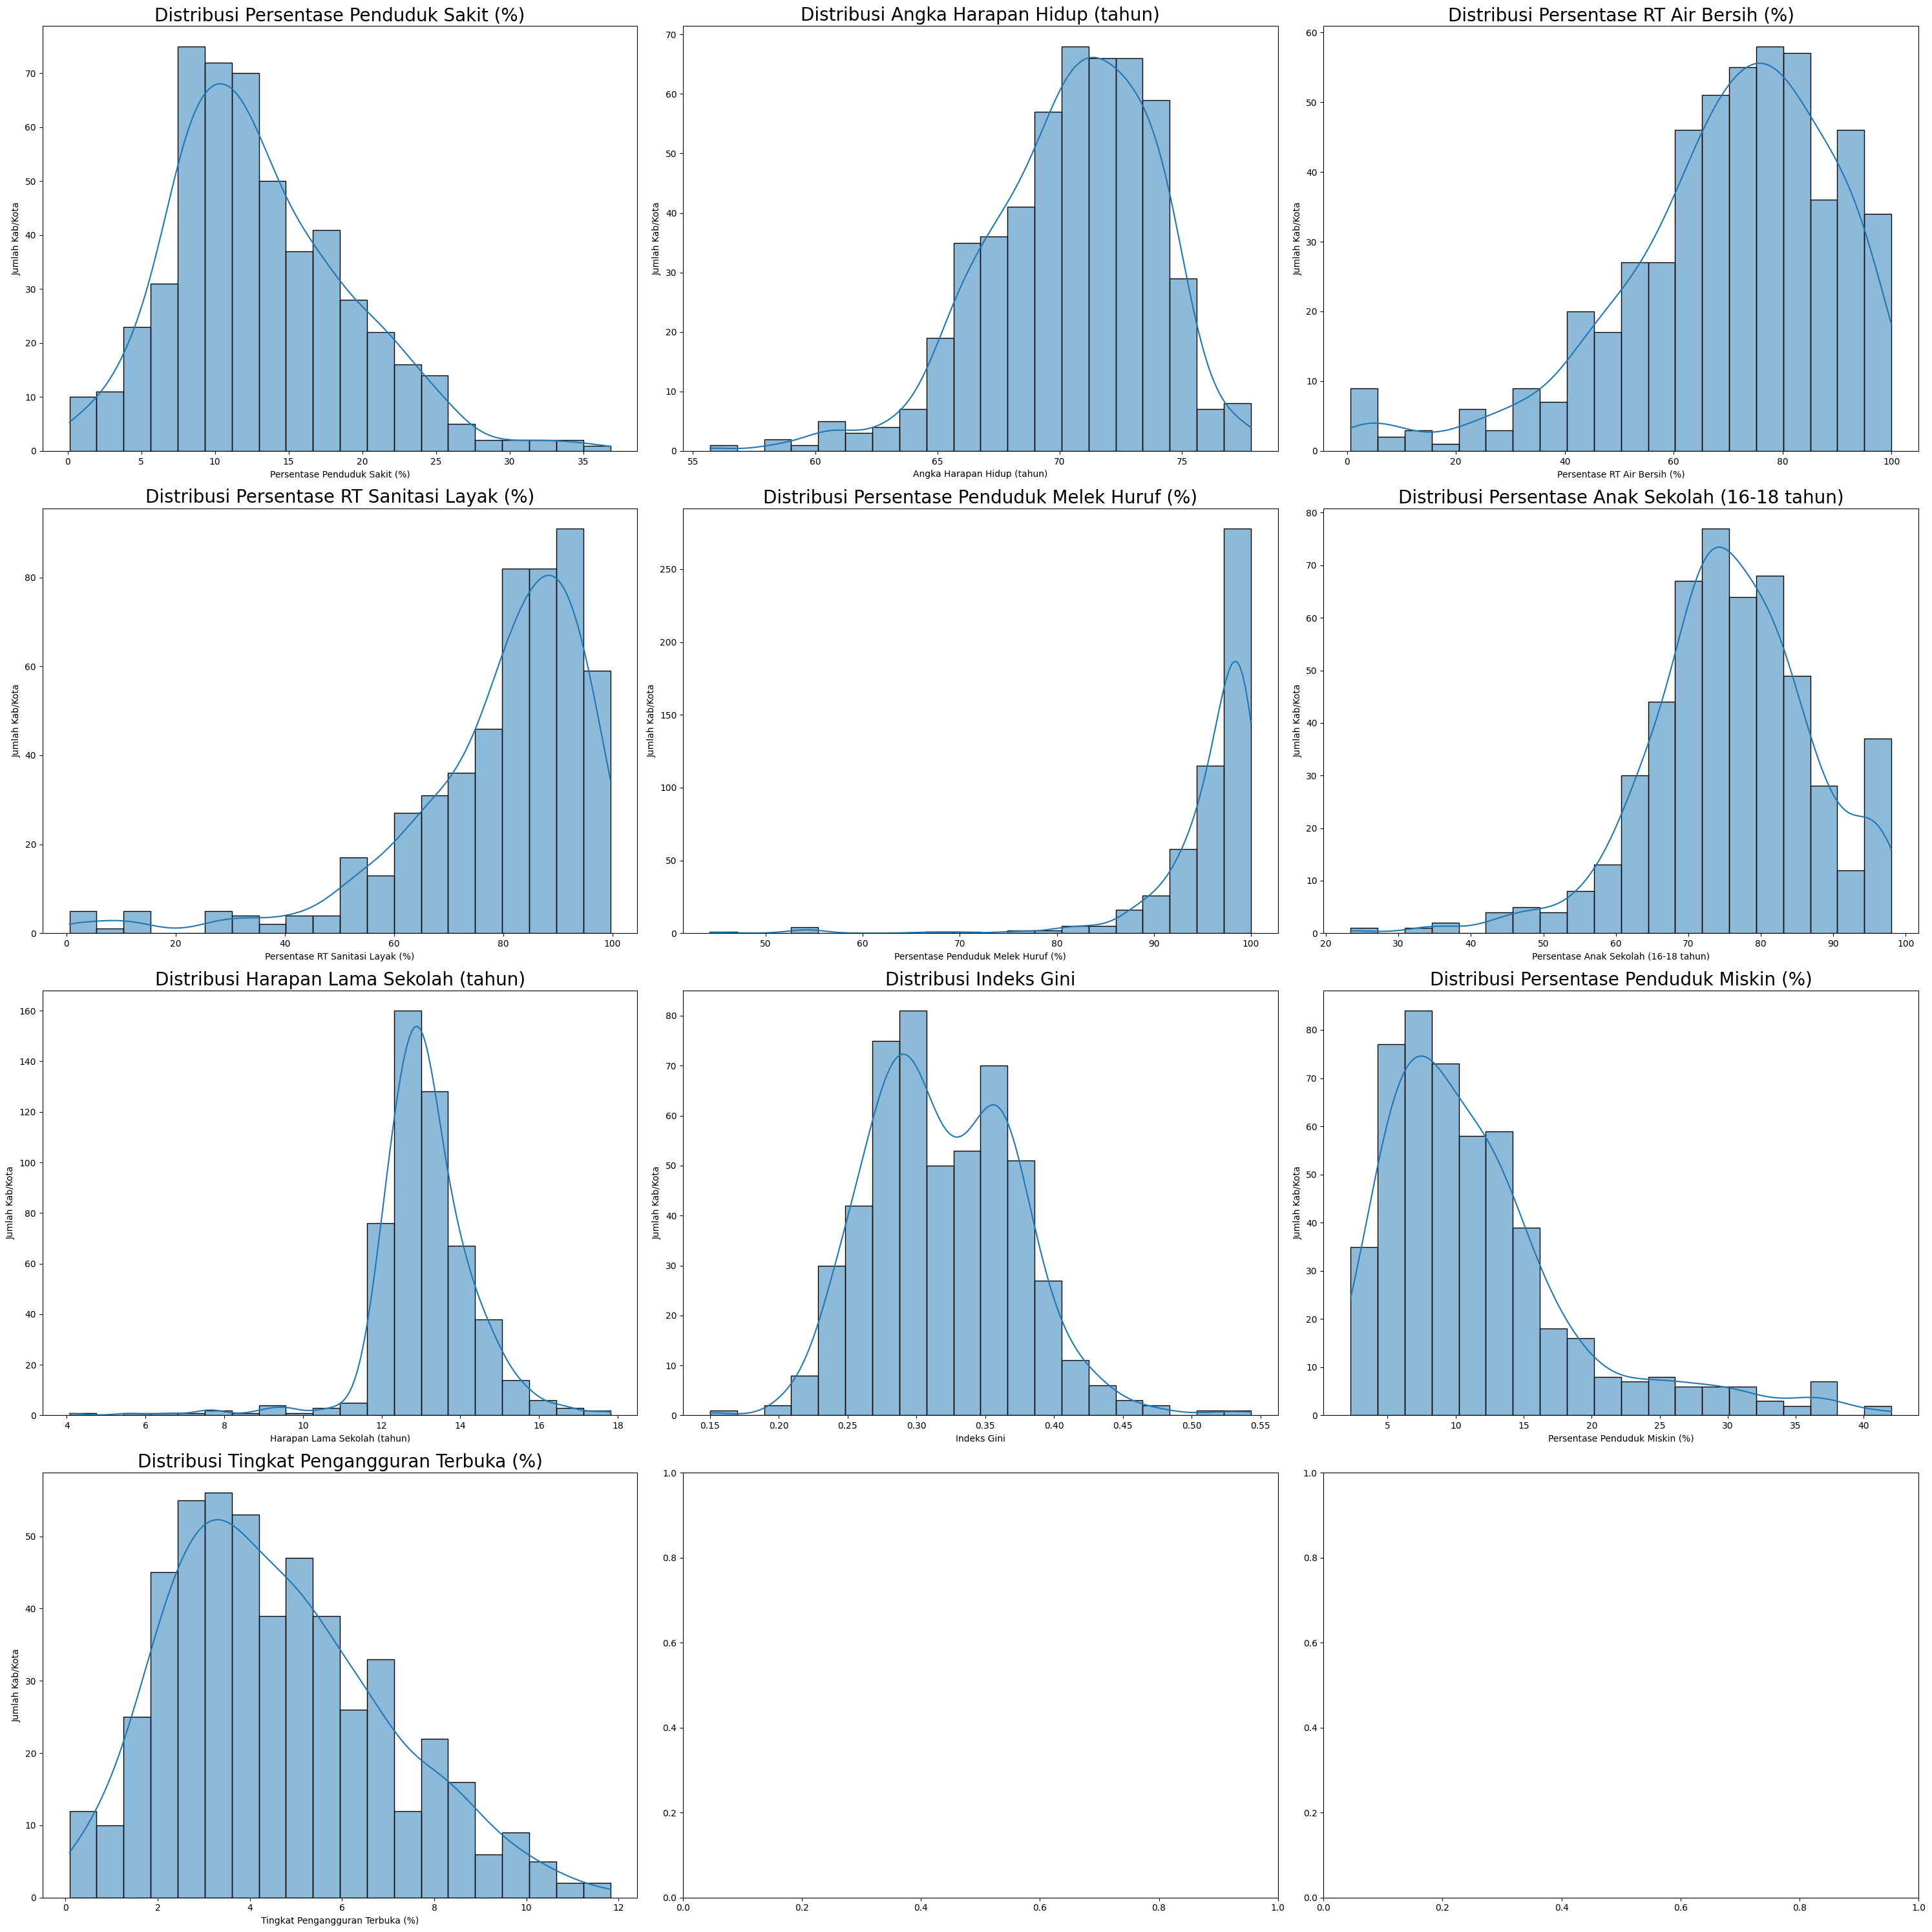

In [ ]:
# Create a larger figure for more subplots
fig, axes = plt.subplots(4, 3, figsize=(30, 30))

# List of columns and their descriptions
variables = [
    ('Angka Kesakitan', 'Persentase Penduduk Sakit (%)'),
    ('AHH', 'Angka Harapan Hidup (tahun)'),
    ('RT Air Bersih', 'Persentase RT Air Bersih (%)'),
    ('RT Sanitasi Layak', 'Persentase RT Sanitasi Layak (%)'),
    ('AMH', 'Persentase Penduduk Melek Huruf (%)'),
    ('APS', 'Persentase Anak Sekolah (16-18 tahun)'),
    ('HLS', 'Harapan Lama Sekolah (tahun)'),
    ('Indeks Gini', 'Indeks Gini'),
    ('Miskin', 'Persentase Penduduk Miskin (%)'),
    ('TPT', 'Tingkat Pengangguran Terbuka (%)')
]

# Plotting histograms for each variable
for ax, (column, xlabel) in zip(axes.flatten(), variables):
    sns.histplot(data[column], bins=20, kde=True, ax=ax)
    ax.set_title(f'Distribusi {xlabel}', fontsize=20)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Jumlah Kab/Kota')

# Adjust layout
plt.tight_layout()
plt.show()


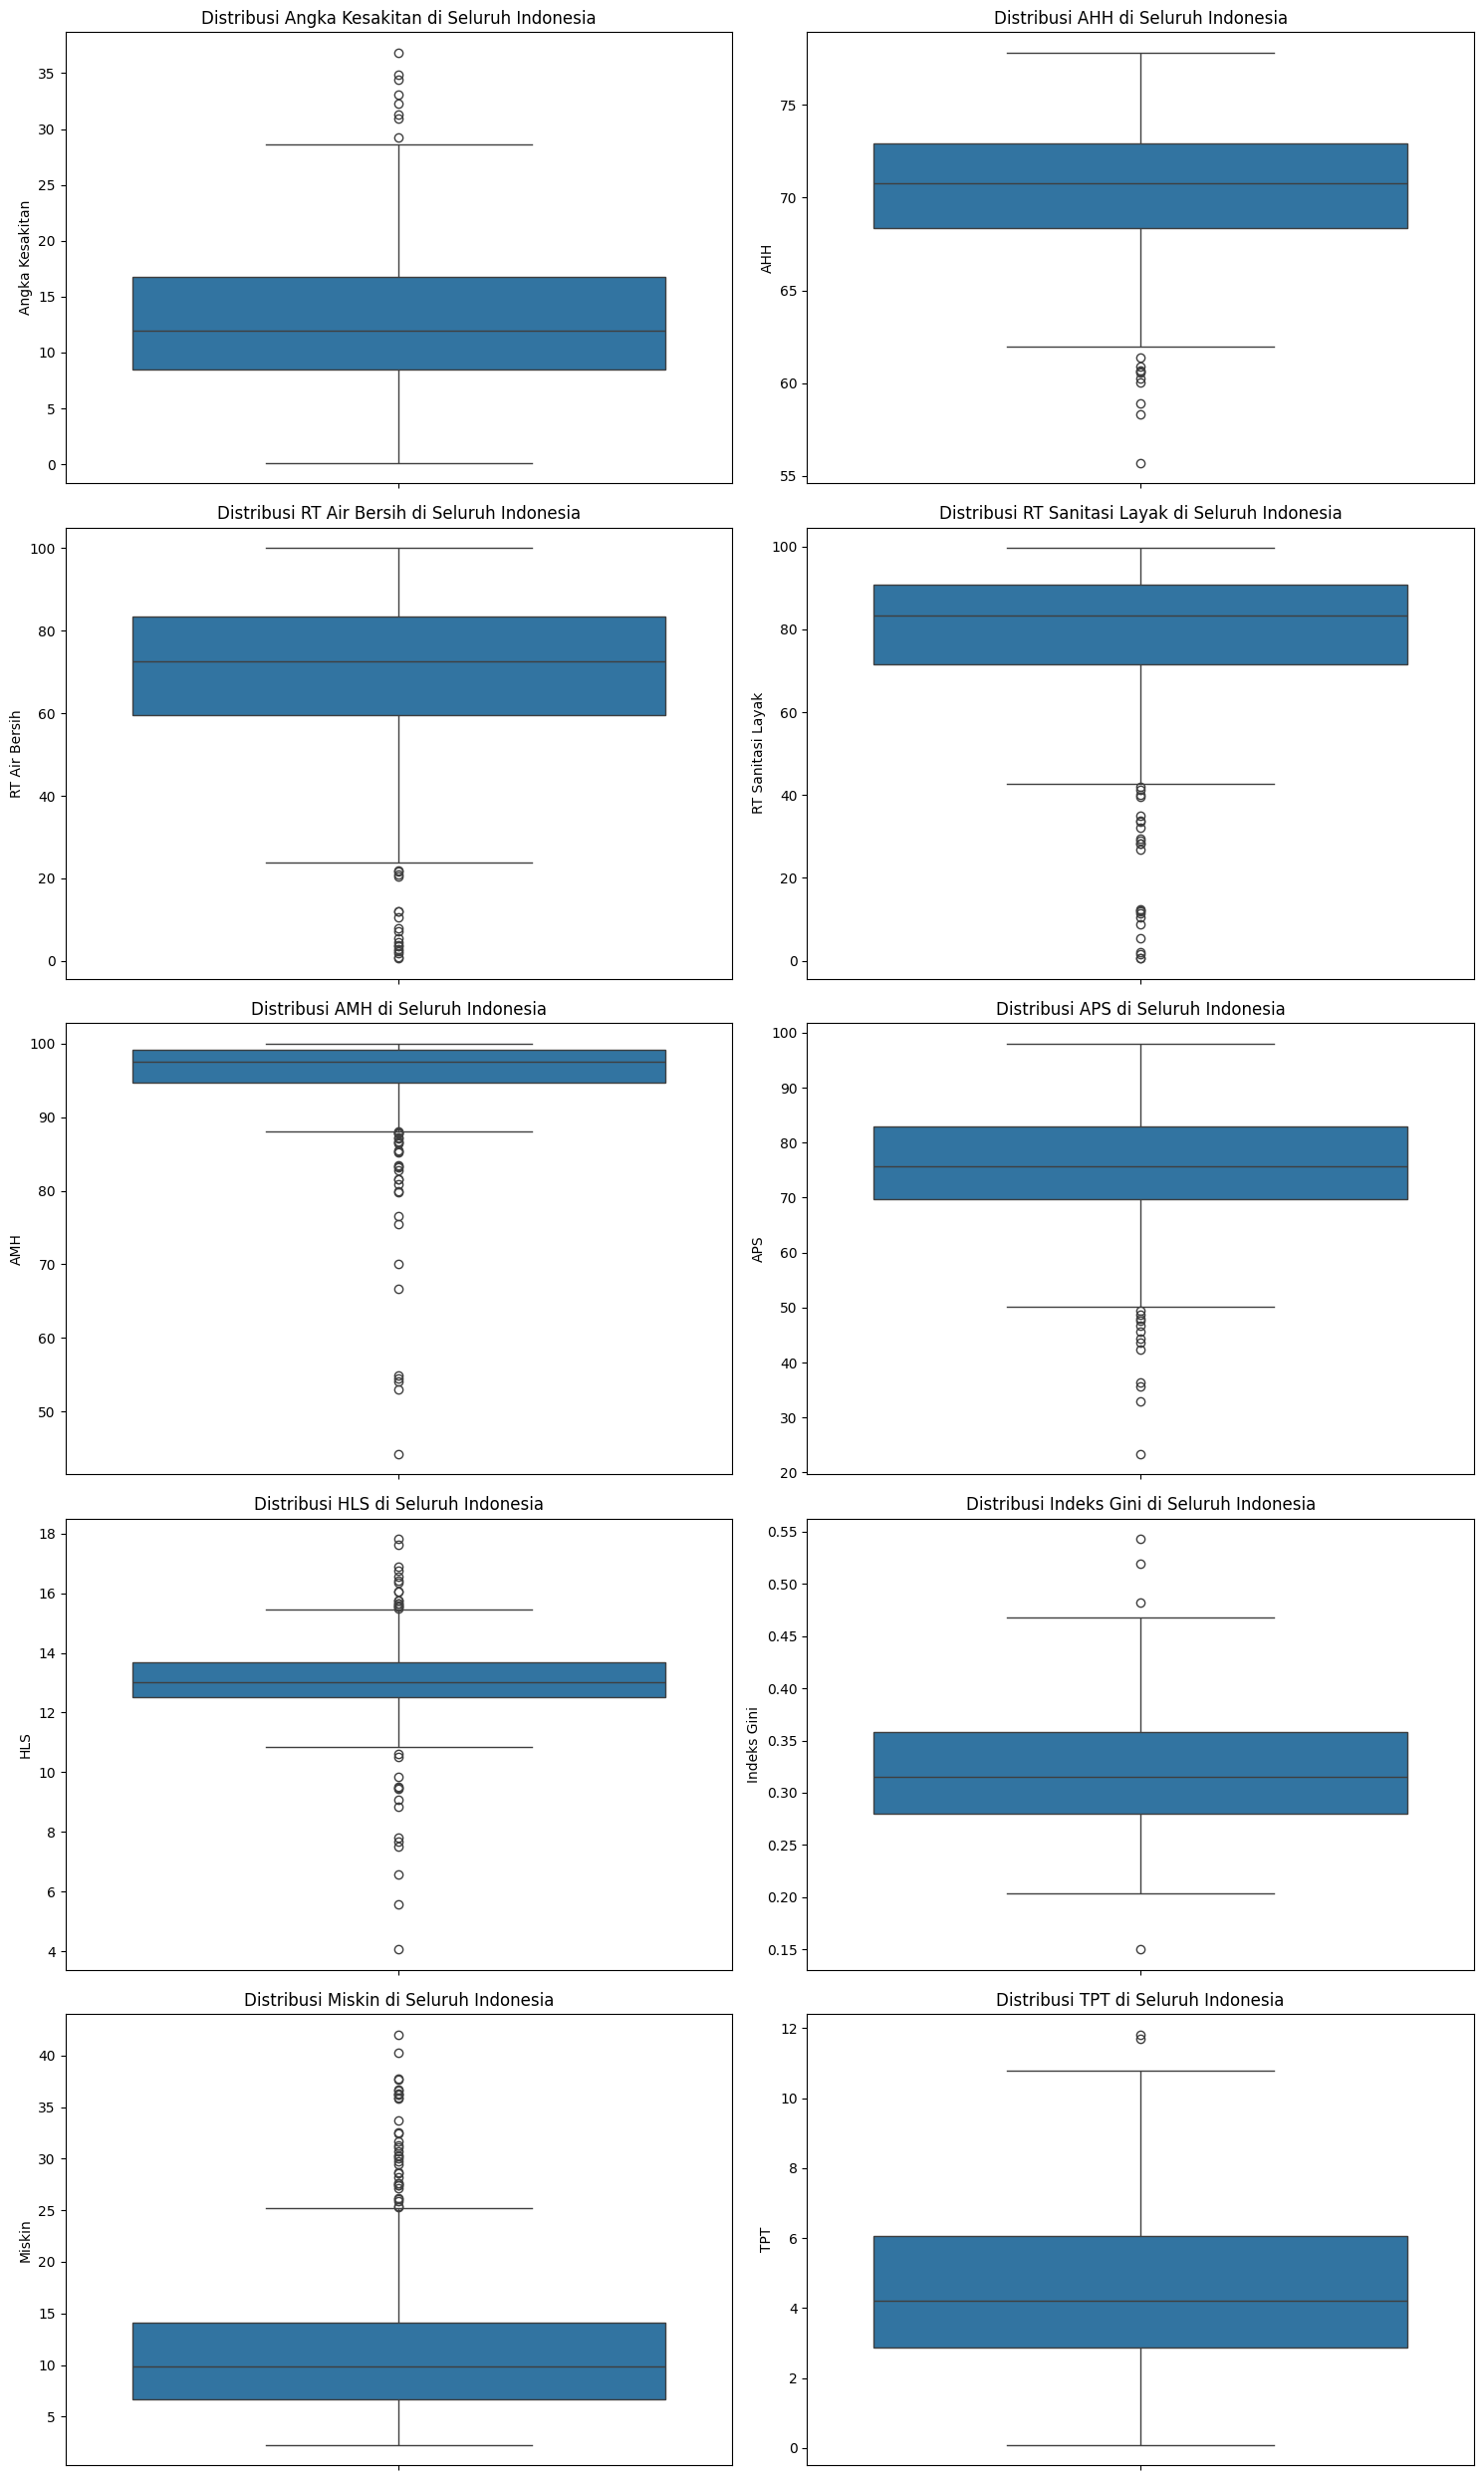

In [ ]:
# Creating a figure for the boxplots
fig, axes = plt.subplots(5, 2, figsize=(15, 25))

columns = ['Angka Kesakitan', 'AHH', 'RT Air Bersih', 'RT Sanitasi Layak', 'AMH', 'APS', 'HLS', 'Indeks Gini', 'Miskin', 'TPT']

# Creating boxplots for each column on the same plot
for ax, column in zip(axes.flatten(), columns):
    sns.boxplot(y=column, data=data, ax=ax)
    ax.set_title(f'Distribusi {column} di Seluruh Indonesia')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()


1. `Angka Kesakitan`: Variabilitas yang cukup lebar dengan beberapa outlier, menunjukkan perbedaan kondisi kesehatan antar area.
2. `AHH` (Angka Harapan Hidup): Terdapat variasi dalam harapan hidup, tetapi sebagian besar data terkumpul di sekitar median.
3. `RT Air Bersih`: Kebanyakan data menunjukkan akses yang baik ke air bersih, namun masih ada beberapa outlier yang rendah.
4. `RT Sanitasi Layak`: Meski sebagian besar memiliki akses yang baik, variasi dan outlier masih ada, menunjukkan ketimpangan dalam fasilitas sanitasi.
5. `AMH` (Angka Melek Huruf): Tingkat melek huruf yang tinggi di sebagian besar daerah, dengan hanya sedikit outlier rendah.
6. `APS` (Angka Partisipasi Sekolah): Sebagian besar area memiliki partisipasi sekolah yang baik, namun masih terdapat variasi.
7. `HLS` (Harapan Lama Sekolah): Terdistribusi relatif merata dengan beberapa outlier yang menunjukkan perbedaan dalam durasi pendidikan yang diharapkan.
8. `Indeks Gini`: Distribusi menunjukkan beberapa ketimpangan ekonomi dengan beberapa outlier yang tinggi, menandakan ketidaksetaraan pendapatan yang signifikan.
9. `Miskin`: Variasi yang cukup lebar, dengan beberapa outlier tinggi yang menunjukkan adanya kemiskinan signifikan di beberapa area.
10. `TPT` (Tingkat Pengangguran Terbuka): Sebagian besar memiliki tingkat pengangguran yang moderat, tetapi dengan beberapa outlier tinggi.

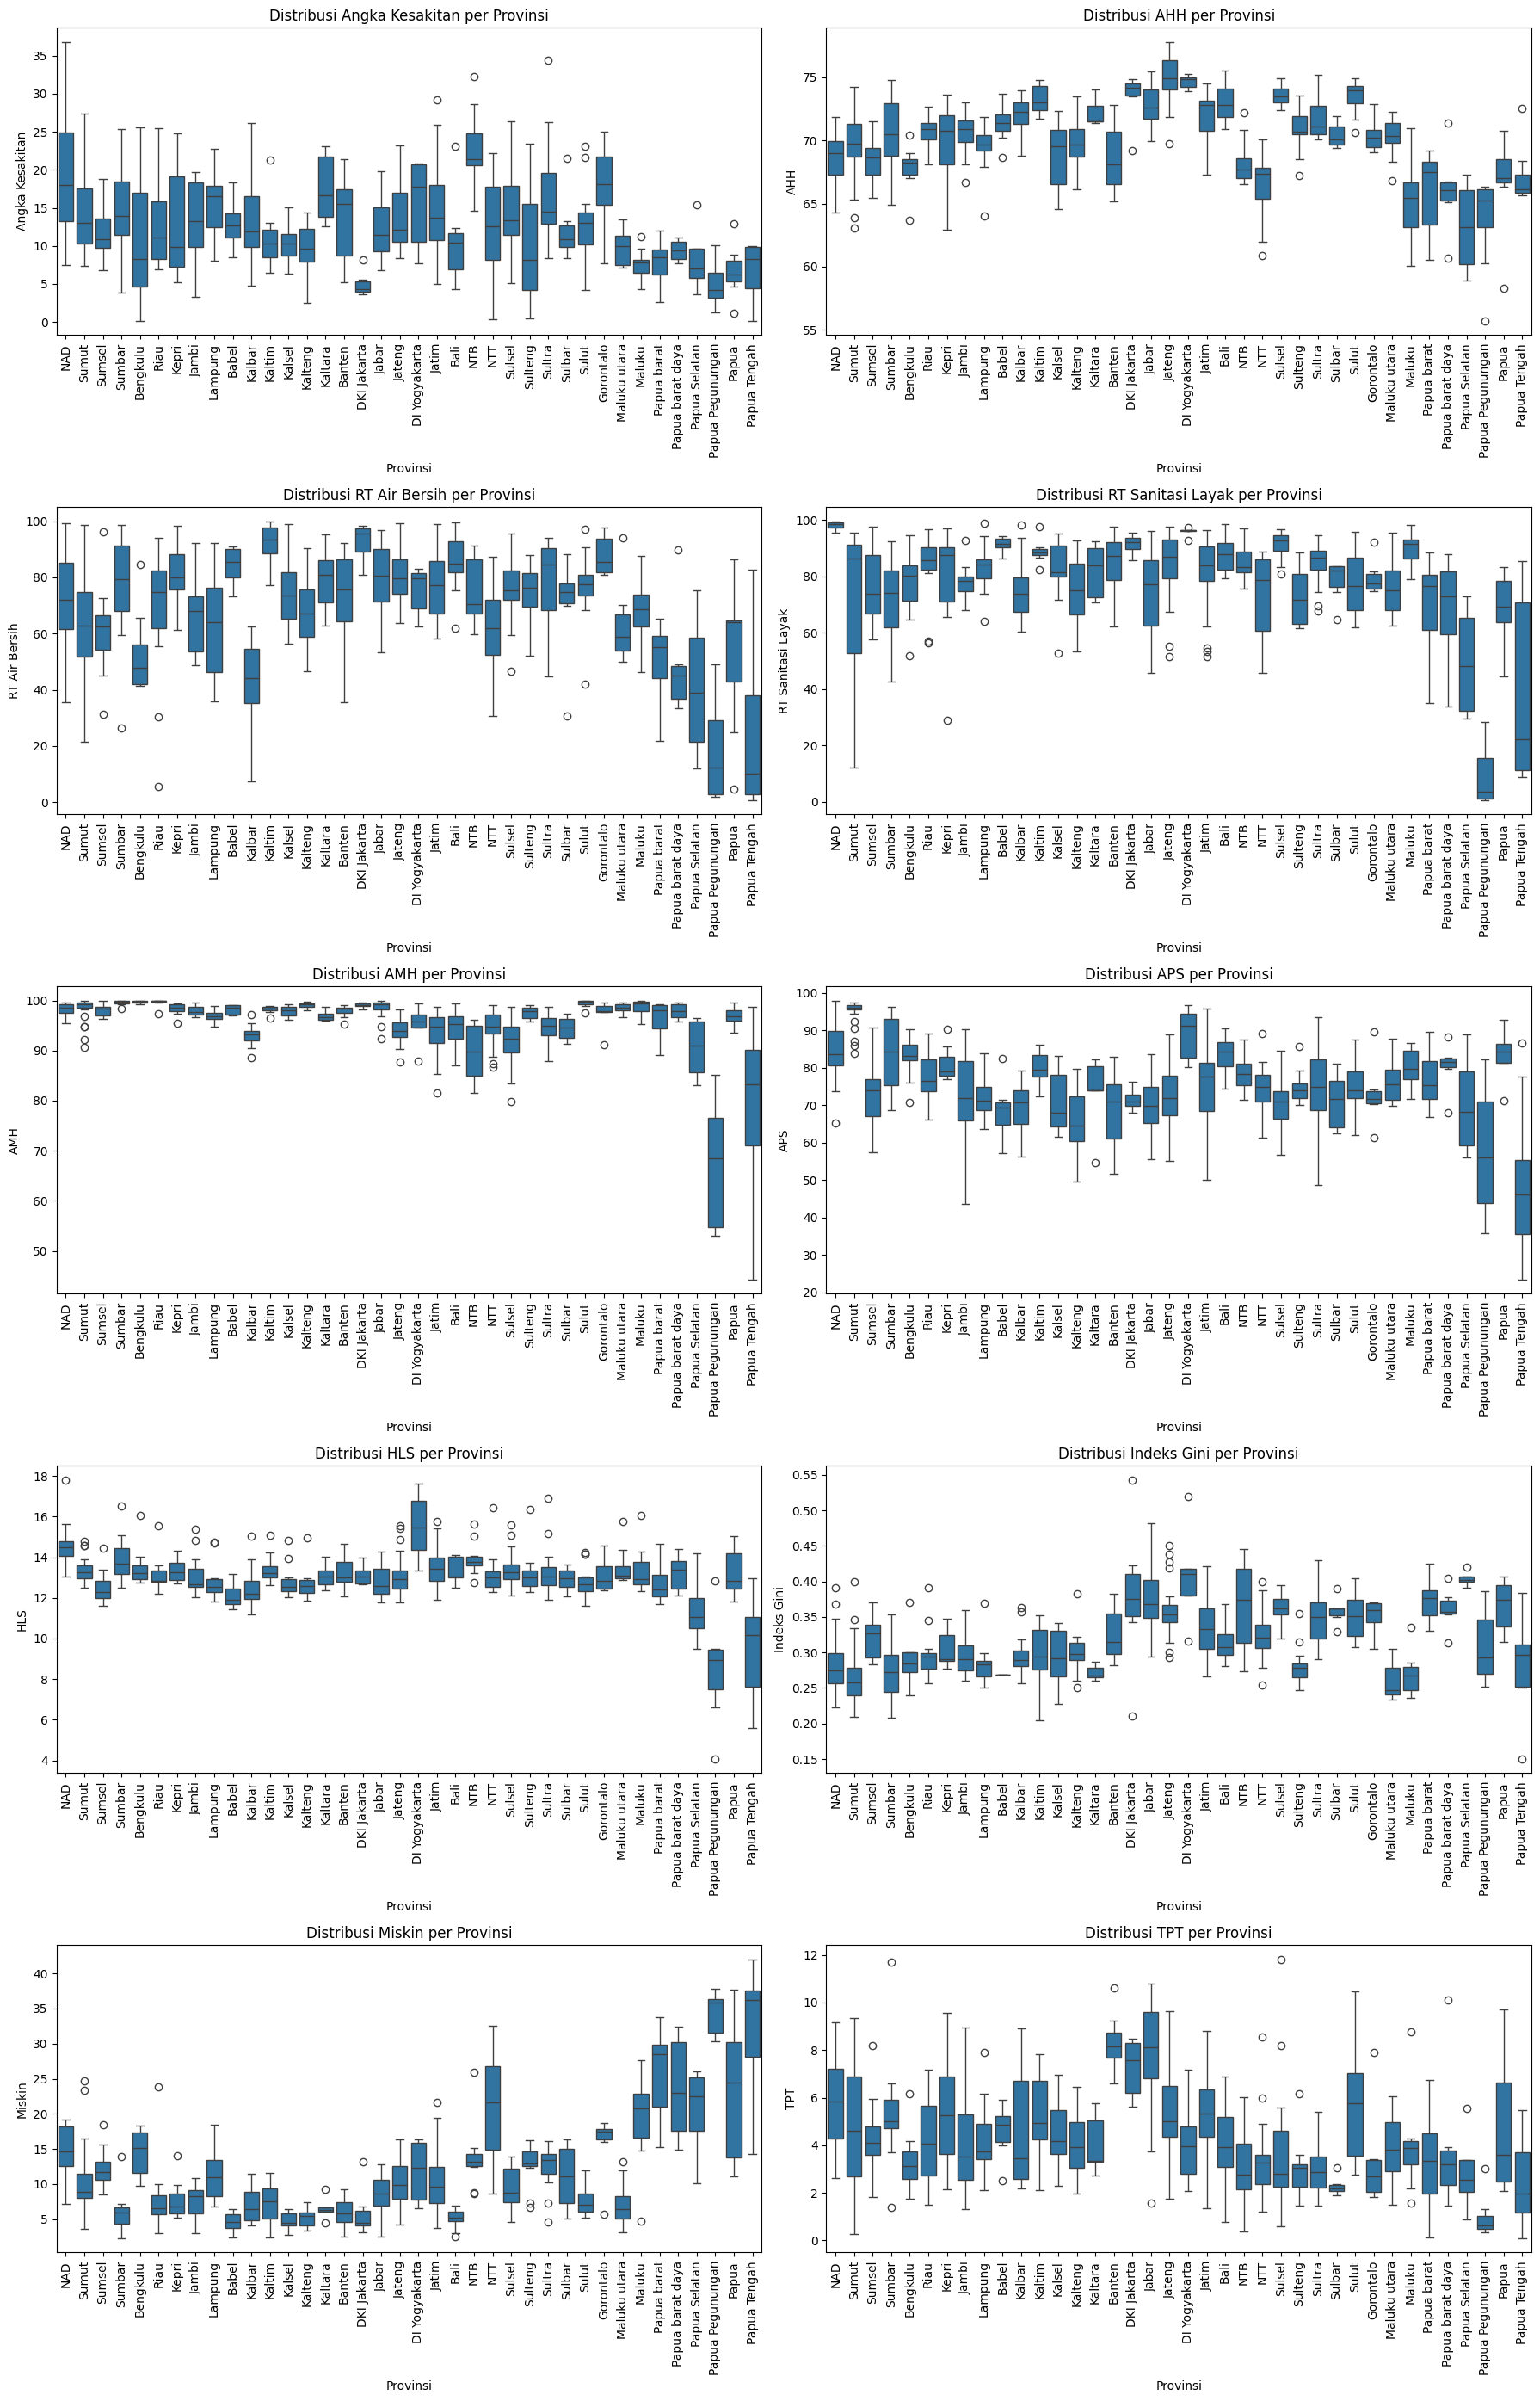

In [ ]:
# Creating a figure and axes for the boxplots
fig, axes = plt.subplots(5, 2, figsize=(18, 28))

# Creating boxplots for each column
for ax, column in zip(axes.flatten(), columns):
    sns.boxplot(x='Provinsi', y=column, data=data, ax=ax)
    ax.set_title(f'Distribusi {column} per Provinsi')
    ax.set_xlabel('Provinsi')
    ax.set_ylabel(column)
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
variable_averages = data[columns].mean()
below_average_counts = (data[columns] < variable_averages).sum()
below_average_counts

Angka Kesakitan      294
AHH                  229
RT Air Bersih        220
RT Sanitasi Layak    187
AMH                  166
APS                  260
HLS                  279
Indeks Gini          271
Miskin               307
TPT                  284
dtype: int64

In [ ]:
above_average_counts =  (data[columns] > variable_averages).sum()
above_average_counts

Angka Kesakitan      220
AHH                  285
RT Air Bersih        294
RT Sanitasi Layak    327
AMH                  348
APS                  254
HLS                  235
Indeks Gini          243
Miskin               207
TPT                  230
dtype: int64

## Preprocessing

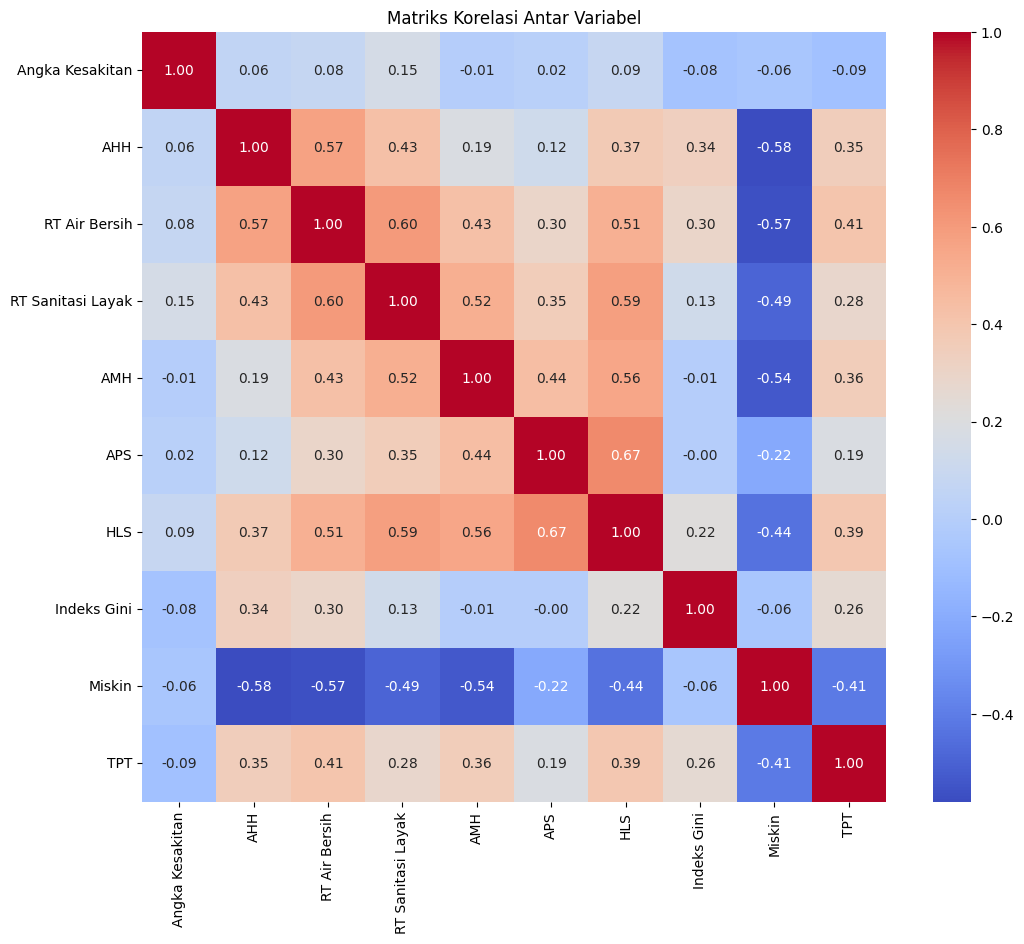

In [ ]:
# Calculating the correlation matrix
correlation_matrix = data[columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

Matriks korelasi menampilkan hubungan antar variabel dalam dataset. Nilai korelasi berkisar antara -1 hingga 1, di mana:

* Nilai mendekati 1 menunjukkan korelasi positif yang kuat, artinya ketika satu variabel meningkat, variabel lain juga cenderung meningkat.
* Nilai mendekati -1 menunjukkan korelasi negatif yang kuat, artinya ketika satu variabel meningkat, variabel lain cenderung menurun.
* Nilai mendekati 0 menunjukkan tidak adanya korelasi yang kuat.

Dari heatmap korelasi, dapat dilihat beberapa korelasi yang menonjol:

* `AHH` memiliki korelasi yang positif dengan `AMH`, `APS` , dan` HLS`. Ini menunjukkan bahwa harapan hidup yang lebih tinggi cenderung berhubungan dengan tingkat pendidikan yang lebih tinggi.
* `Indeks Gini` memiliki korelasi yang positif dengan `TPT`, yang menunjukkan bahwa ketimpangan pendapatan mungkin berhubungan dengan tingkat pengangguran yang lebih tinggi.
* `RT Air Bersih` dan `RT Sanitasi Layak` juga menunjukkan korelasi positif, yang masuk akal karena kedua indikator tersebut sering berkaitan dengan infrastruktur yang baik.

In [ ]:
# Uji Multikolienaritas menggunakan nilai Variance Inflation Factor (VIF)

numeric_data = data.select_dtypes(include=[np.number])
numeric_data = numeric_data.dropna()

# Calculating VIF for each column
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_data.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]

vif_data



,Variable,VIF
0,Angka Kesakitan,5.830668
1,AHH,279.740884
2,RT Air Bersih,27.806608
3,RT Sanitasi Layak,41.028287
4,AMH,284.545261
5,APS,90.224652
6,HLS,299.444092
7,Indeks Gini,49.963983
8,Miskin,5.351226
9,TPT,6.862359


Karena hampir semua variabel memiliki nilai VIF > 10, maka dapat dikatakan data menunjukkan multikolienaritas yang tinggi

In [ ]:
# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Verifying the mean and standard deviation of the standardized data
pd.DataFrame(scaled_data, columns=numeric_data.columns).describe()

,Angka Kesakitan,AHH,RT Air Bersih,RT Sanitasi Layak,AMH,APS,HLS,Indeks Gini,Miskin,TPT
count,5.140000e+02,5.140000e+02,5.140000e+02,5.140000e+02,5.140000e+02,5.140000e+02,5.140000e+02,5.140000e+02,5.140000e+02,5.140000e+02
mean,-3.317709e-16,1.036784e-15,-2.902996e-16,6.981013e-16,-1.437674e-15,-8.847225e-16,-7.395727e-16,-4.423612e-16,1.105903e-16,5.529515e-16
std,1.000974e+00,1.000974e+00,1.000974e+00,1.000974e+00,1.000974e+00,1.000974e+00,1.000974e+00,1.000974e+00,1.000974e+00,1.000974e+00
min,-2.095819e+00,-4.343918e+00,-3.424111e+00,-4.372502e+00,-8.439433e+00,-4.621166e+00,-6.913370e+00,-3.194033e+00,-1.292845e+00,-1.938889e+00
25%,-7.327036e-01,-6.119986e-01,-4.949835e-01,-3.967323e-01,-1.734186e-01,-5.331052e-01,-4.522397e-01,-7.436009e-01,-6.926786e-01,-7.422963e-01
50%,-1.697485e-01,9.459779e-02,1.454413e-01,2.583374e-01,2.925838e-01,-1.184001e-02,-6.135287e-02,-8.386918e-02,-2.555371e-01,-1.634391e-01
75%,6.072595e-01,7.334081e-01,6.873392e-01,6.810534e-01,5.493356e-01,6.289875e-01,4.598296e-01,7.266584e-01,3.367192e-01,6.357293e-01
max,3.866794e+00,2.175336e+00,1.506701e+00,1.170956e+00,6.906105e-01,1.961379e+00,3.617582e+00,4.213812e+00,4.175723e+00,3.128271e+00


## PCA
Untuk mengatasi data multikolienaritas

In [ ]:
# Implementing PCA
pca = PCA(n_components=3)  # Retain 95% of the variance
pca_data = pca.fit_transform(scaled_data)

# Number of components chosen and the variance ratio
pca_explained_variance_ratio = pca.explained_variance_ratio_
pca_n_components = pca.n_components_

pca_data.shape, pca_explained_variance_ratio, pca_n_components

((514, 3), array([0.4093048 , 0.13671291, 0.1104069 ]), 3)

## FCM

In [ ]:
# Define Fuzzy C-Means clustering algorithm
class FCM:
    def __init__(self, n_clusters: int, max_iter: int = 100, tolerance: float = 1e-4, fuzziness: float = 2.0, seed: int = None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.fuzziness = fuzziness
        self.seed = seed if seed else np.random.randint(0, 1000)
        self.membership_matrix = None
        self.centroids = None
        self.objective_function = None

    def _init_membership_matrix(self, data: np.ndarray):
        np.random.seed(self.seed)
        membership_matrix = np.random.rand(data.shape[0], self.n_clusters)
        membership_matrix /= np.sum(membership_matrix, axis=1)[:, np.newaxis]
        return membership_matrix

    def _calc_centroids(self, data: np.ndarray, membership_matrix: np.ndarray):
        centroids = np.zeros((self.n_clusters, data.shape[1]))
        for i in range(self.n_clusters):
            numerator = np.sum((membership_matrix[:, i]**self.fuzziness)[:, np.newaxis] * data, axis=0)
            denominator = np.sum(membership_matrix[:, i]**self.fuzziness)
            centroids[i, :] = numerator / denominator
        return centroids

    def _update_membership_matrix(self, data: np.ndarray, centroids: np.ndarray):
        updated_membership_matrix = np.zeros((data.shape[0], self.n_clusters))
        for i in range(data.shape[0]):
            for j in range(self.n_clusters):
                sum_dist = np.sum((np.linalg.norm(data[i] - centroids[j]) / np.linalg.norm(data[i] - centroids[k]))**(2 / (self.fuzziness - 1)) for k in range(self.n_clusters))
                updated_membership_matrix[i, j] = 1 / sum_dist
        updated_membership_matrix /= np.sum(updated_membership_matrix, axis=1)[:, np.newaxis]
        return updated_membership_matrix

    def fit(self, data: np.ndarray):
        self.membership_matrix = self._init_membership_matrix(data)
        for iteration in range(self.max_iter):
            centroids = self._calc_centroids(data, self.membership_matrix)
            updated_membership_matrix = self._update_membership_matrix(data, centroids)

            obj_function = np.sum((self.membership_matrix**self.fuzziness) * np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)**2)
            if iteration > 0 and np.abs(obj_function - self.objective_function) < self.tolerance:
                break

            self.centroids = centroids
            self.membership_matrix = updated_membership_matrix
            self.objective_function = obj_function
            print(f"Iteration {iteration + 1}/{self.max_iter}, Objective Function: {self.objective_function}")

        self.calculate_validity_indices(data)

    def calculate_validity_indices(self, data):
        min_dist = np.min([np.linalg.norm(self.centroids[i] - self.centroids[j]) for i in range(self.n_clusters) for j in range(i + 1, self.n_clusters)])
        xb = np.sum(self.membership_matrix**2 * np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)**2) / (data.shape[0] * min_dist**2)
        pc = np.sum(self.membership_matrix**2) / data.shape[0]
        vi = np.sum(self.membership_matrix * np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)**2, axis=0) / np.sum(self.membership_matrix, axis=0)
        pi = np.sum(vi) / min_dist
        s = min_dist

        print(f"Partition Coefficient (PC): {pc}")
        print(f"Xie and Beni’s Index (XB): {xb}")
        print(f"Partition Index (PI): {pi}")
        print(f"Separation Index (S): {s}")

    def predict(self, data: np.ndarray):
        distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

## Silhouette Scores

In [ ]:
# @title
silhouette_scores = []

cluster_range = range(2, 11)

# Calculate silhouette scores for different numbers of clusters
for n_clusters in cluster_range:
  fcm = FCM(n_clusters=n_clusters, max_iter=1000, tolerance=1e-4, fuzziness=2.0)
  fcm.fit(pca_data)
  cluster_labels = fcm.predict(pca_data)
  silhouette_avg = silhouette_score(pca_data, cluster_labels)
  silhouette_scores.append(silhouette_avg)
  print(f"Silhouette score for {n_clusters} clusters: {silhouette_avg}")

# Determine the optimal number of clusters based on the silhouette score
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_clusters}")

In [ ]:
# Initialize FCM with 3 clusters
fcm = FCM(n_clusters=3, max_iter=1000, tolerance=1e-5, fuzziness=2.0, seed=42)

In [ ]:
# Fit FCM to the PCA-transformed data
fcm.fit(pca_data)

# Predict cluster memberships
cluster_labels = fcm.predict(pca_data)

unique_labels, counts = np.unique(cluster_labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} members")

<ipython-input-50-ab9ca08e638c>:31: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_dist = np.sum((np.linalg.norm(data[i] - centroids[j]) / np.linalg.norm(data[i] - centroids[k]))**(2 / (self.fuzziness - 1)) for k in range(self.n_clusters))


Iteration 1/1000, Objective Function: 1455.5202188065384
Iteration 2/1000, Objective Function: 1123.9119493497656
Iteration 3/1000, Objective Function: 1122.3751402607925
Iteration 4/1000, Objective Function: 1117.9503343949873
Iteration 5/1000, Objective Function: 1107.5278629266654
Iteration 6/1000, Objective Function: 1090.088261274523
Iteration 7/1000, Objective Function: 1071.0280974676298
Iteration 8/1000, Objective Function: 1055.6088858224844
Iteration 9/1000, Objective Function: 1044.3599091947783
Iteration 10/1000, Objective Function: 1037.2746512899878
Iteration 11/1000, Objective Function: 1033.573926254973
Iteration 12/1000, Objective Function: 1031.8674790005261
Iteration 13/1000, Objective Function: 1031.1182568073546
Iteration 14/1000, Objective Function: 1030.788278354874
Iteration 15/1000, Objective Function: 1030.637972968132
Iteration 16/1000, Objective Function: 1030.5660143645455
Iteration 17/1000, Objective Function: 1030.529578860742
Iteration 18/1000, Objective

## Uji Validitas Cluster

In [ ]:
# Calculating Davies-Bouldin Index
dbi_score = davies_bouldin_score(pca_data, cluster_labels)

dbi_score


1.306529828545287

* Nilai DBI berkisar antara 0 hingga tak terhingga, di mana nilai yang lebih rendah menunjukkan clustering yang lebih baik.
* Skor DBI yang lebih tinggi menandakan overlap yang lebih besar antara cluster atau cluster yang kurang terdefinisi dengan baik dalam hal jarak antar-cluster dan variabilitas intra-cluster.

## Post Processing

In [ ]:
# Add the cluster labels to the original data
data['Cluster'] = cluster_labels

# Calculate the mean of each column grouped by the cluster
cluster_summary = data.select_dtypes(include=[np.number]).groupby('Cluster').mean()

# Display the summary statistics for each cluster
cluster_summary

,Angka Kesakitan,AHH,RT Air Bersih,RT Sanitasi Layak,AMH,APS,HLS,Indeks Gini,Miskin,TPT
Cluster,,,,,,,,,,
0,16.550133,70.929558,71.347699,81.601106,95.474494,72.702235,12.881504,0.310969,10.548186,3.916504
1,9.672901,66.683740,48.137863,63.529160,93.604209,73.838779,12.356260,0.296252,18.674885,3.205802
2,10.763312,72.866306,85.138854,87.168981,98.047489,81.835669,14.002516,0.351013,7.464395,6.676306


In [ ]:
data

Berikut adalah interpretasi dari rata-rata indikator kesejahteraan rakyat untuk setiap cluster yang dihasilkan dari analisis Fuzzy C-Means:

1. Cluster 0:
  * `Angka Kesakitan` Tinggi: Nilai rata-rata yang lebih tinggi (16.39%) dibandingkan cluster lain, menunjukkan bahwa penduduk di daerah ini lebih sering melaporkan sakit.
  `AHH` dan Fasilitas Baik: Memiliki` AHH` yang relatif tinggi (70.67 tahun) dan akses yang lebih baik ke `air bersih` dan `sanitasi`.
  Pendidikan dan Ekonomi: Tingkat pendidikan (`APS` dan `HLS`) dan `AMH` yang cukup tinggi, dengan `Indeks Gini` yang menunjukkan ketimpangan yang moderat dan `persentase kemiskinan` yang paling rendah (10.49%).
  Pengangguran Rendah: `TPT` terendah (3.70%) di antara cluster, menandakan kondisi ekonomi yang stabil.
2. Cluster 1:
  * `Angka Kesakitan` Rendah: Terendah di antara ketiga cluster (11.63%), menunjukkan kondisi kesehatan yang lebih baik atau kurangnya pelaporan.
  * `AHH` Rendah dan Fasilitas Kurang: `AHH terendah` (67.31 tahun) dan akses yang paling kurang ke `air bersih` dan `sanitasi`.
  * Pendidikan dan Ekonomi Kurang Menguntungkan: Level pendidikan serupa dengan cluster lain tetapi memiliki tingkat kemiskinan yang tinggi (17.02%).
  * Pengangguran Paling Rendah: Meskipun memiliki `kemiskinan` yang tinggi, tetapi `TPT` adalah yang terendah (3.22%), mungkin karena pekerjaan informal atau pekerjaan berupah rendah.
3. Cluster 2:
  * `Angka Kesakitan` Sedang: Memiliki `angka kesakitan` yang sedang (12.40%) dibandingkan dengan dua cluster lain.
  * `AHH Tinggi` dan Fasilitas Sangat Baik: Memiliki `AHH` yang paling tinggi (72.74 tahun) dan akses terbaik ke `air bersih` dan `sanitasi`.
  * Pendidikan dan Ekonomi Terbaik: Tingkat pendidikan dan melek huruf yang paling tinggi dengan `Indeks Gini` yang tinggi (0.34), menunjukkan ketimpangan pendapatan yang lebih besar namun `kemiskinan` yang sangat rendah (8.15%).
  * Pengangguran Tinggi: Memiliki `TPT` yang paling tinggi (6.08%), yang bisa jadi menunjukkan ketidaksesuaian antara kualifikasi penduduk dengan pekerjaan yang tersedia.

Secara keseluruhan, Cluster 2 tampaknya merupakan cluster dengan kondisi kesejahteraan paling tinggi, Cluster 0 menunjukkan stabilitas ekonomi dengan tingkat pendidikan dan kesehatan yang baik, sementara Cluster 1 menghadapi tantangan dalam kesehatan, pendidikan, dan akses ke fasilitas dasar. Insights ini dapat digunakan oleh pembuat kebijakan untuk mengalokasikan sumber daya dan merancang intervensi yang sesuai dengan kebutuhan spesifik setiap cluster. ​

In [ ]:
# Create a new DataFrame with only 'Kab/kota' and 'Cluster'
cluster_kabupaten = data[['Kab/kota', 'Cluster']]

# Grouping kabupaten/kota by cluster and displaying them
clustered_kabupaten_groups = cluster_kabupaten.groupby('Cluster')['Kab/kota'].apply(list)

# Display each cluster's kabupaten/kota
clustered_kabupaten_groups


Cluster
0    [Simeulue, Aceh Singkil, Aceh Tenggara, Aceh T...
1    [Aceh Selatan, Gayo Lues, Sabulussalam, Nias, ...
2    [Aceh Besar, Aceh Utara, Aceh Tamiang, Banda A...
Name: Kab/kota, dtype: object

In [ ]:
# Convert the series with lists of kabupaten/kota into a DataFrame for better readability and display
clustered_kabupaten_df = clustered_kabupaten_groups.apply(pd.Series).transpose()
clustered_kabupaten_df.columns = [f'Cluster {i}' for i in clustered_kabupaten_df.columns]  # Renaming columns for clarity

# Display the DataFrame
clustered_kabupaten_df

,Cluster 0,Cluster 1,Cluster 2
0,Simeulue,Aceh Selatan,Aceh Besar
1,Aceh Singkil,Gayo Lues,Aceh Utara
2,Aceh Tenggara,Sabulussalam,Aceh Tamiang
3,Aceh Timur,Nias,Banda Aceh
4,Aceh Tengah,Mandailing Natal,Sabang
...,...,...,...
221,Gorontalo Utara,NaN,NaN
222,Halmahera Selatan,NaN,NaN
223,Halmahera Utara,NaN,NaN
224,Pulau Morotai,NaN,NaN


In [ ]:
# Gabungkan nama kab/kota untuk setiap provinsi dan cluster
grouped = data.groupby(['Provinsi', 'Cluster'])['Kab/kota'].apply(lambda x: ', '.join(x)).unstack(fill_value='-')

# Reset index untuk menjadikan kolom 'Provinsi'
grouped.reset_index(inplace=True)


In [ ]:
grouped

Cluster,Provinsi,0,1,2
0,Babel,"Bangka, Belitung, Bangka Barat, Bangka Tengah,...",-,Pangkalpinang
1,Bali,"Bangli, Karangasem",-,"Jembrana, Tabanan, Badung, Gianyar, Klungkung,..."
2,Banten,"Lebak, Serang, Kota Serang",Pandeglang,"Tangerang, Kota Tangerang, Cilegon, Kota Tange..."
3,Bengkulu,Seluma,"Bengkulu Selatan, Rejang Lebong, Bengkulu Utar...",Kota Bengkulu
4,DI Yogyakarta,"Kulonprogo, Gunungkidul",-,"Bantul, Sleman, Kota Yogyakarta"
5,DKI Jakarta,Kepulauan Seribu,-,"Jakarta Selatan, Jakarta Timur, Jakarta Pusat,..."
6,Gorontalo,"Boalemo, Gorontalo, Pohuwato, Bone Bolango, Go...",-,Kota Gorontalo
7,Jabar,"Sukabumi, Cianjur, Garut, Tasikmalaya, Ciamis,...",-,"Bogor, Bandung, Kuningan, Cirebon, Sumedang, S..."
8,Jambi,"Kerinci, Merangin, Sarolangun, Batanghari, Mua...",Tanjung Jabung Barat,"Kota Jambi, Kota Sungai Penuh"
9,Jateng,"Banyumas, Purbalingga, Banjarnegara, Kebumen, ...",-,"Cilacap, Boyolali, Klaten, Sukoharjo, Karanga..."


In [ ]:
grouped.to_excel("/content/drive/MyDrive/Data Skripsi/Hasil FCM.xlsx", index=False)

In [ ]:
provinsi_cluster_counts = data.groupby(['Provinsi', 'Cluster'])['Kab/kota'].count().unstack(fill_value=0)
provinsi_cluster_counts

Cluster,0,1,2
Provinsi,,,
Babel,6,0,1
Bali,2,0,7
Banten,3,1,4
Bengkulu,1,8,1
DI Yogyakarta,2,0,3
DKI Jakarta,1,0,5
Gorontalo,5,0,1
Jabar,8,0,19
Jambi,8,1,2


In [ ]:
# Hitung total kabupaten/kota per provinsi
provinsi_totals = provinsi_cluster_counts.sum(axis=1)

# Hitung persentase
provinsi_cluster_percentages = provinsi_cluster_counts.div(provinsi_totals, axis=0) * 100

In [ ]:
provinsi_cluster_percentages.to_excel("/content/drive/MyDrive/Data Skripsi/Hasil FCM (%).xlsx")

In [ ]:
provinsi_cluster_percentages = pd.read_excel("/content/drive/MyDrive/Data Skripsi/Hasil FCM (%).xlsx")
provinsi_cluster_percentages

,Provinsi,0,1,2
0,Babel,85.714286,0.000000,14.285714
1,Bali,22.222222,0.000000,77.777778
2,Banten,37.500000,12.500000,50.000000
3,Bengkulu,10.000000,80.000000,10.000000
4,DI Yogyakarta,40.000000,0.000000,60.000000
5,DKI Jakarta,16.666667,0.000000,83.333333
6,Gorontalo,83.333333,0.000000,16.666667
7,Jabar,29.629630,0.000000,70.370370
8,Jambi,72.727273,9.090909,18.181818
9,Jateng,51.428571,0.000000,48.571429


In [ ]:
# Function to plot cluster data
def plot_cluster(data, cluster_name):
    plt.figure(figsize=(12, 6))
    plt.bar(data['Provinsi'], data[cluster_name], color='skyblue')
    plt.xlabel('Provinsi')
    plt.ylabel('Persentase (%)')
    plt.title(f'Persentase Provinsi di {cluster_name}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


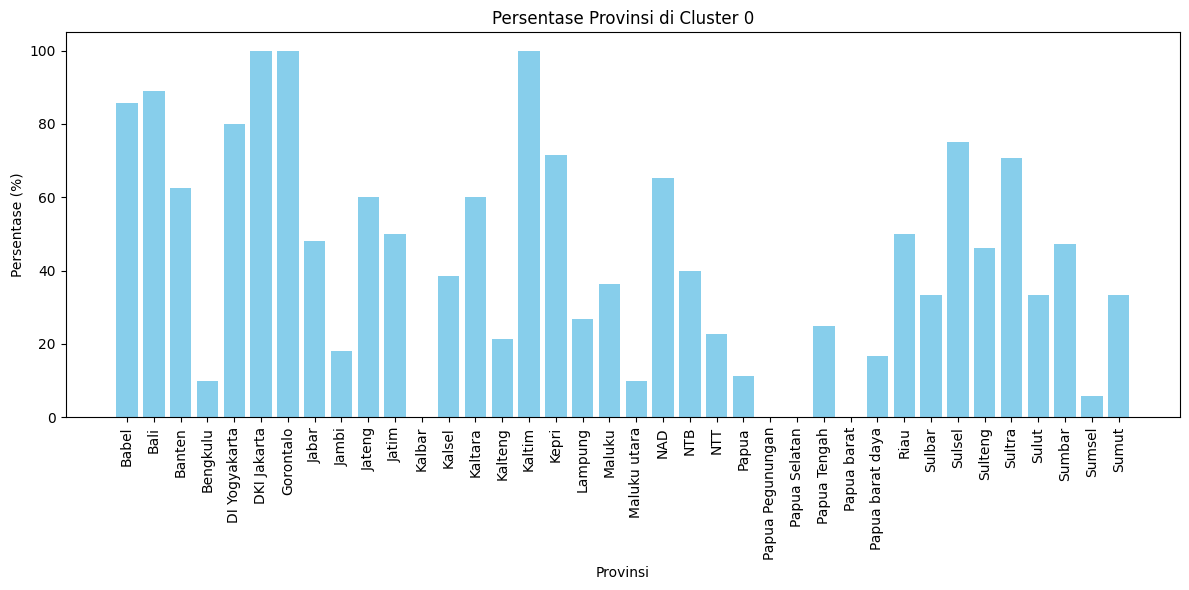

In [ ]:
# Plot for Cluster 0
plot_cluster(provinsi_cluster_percentages, 'Cluster 0')

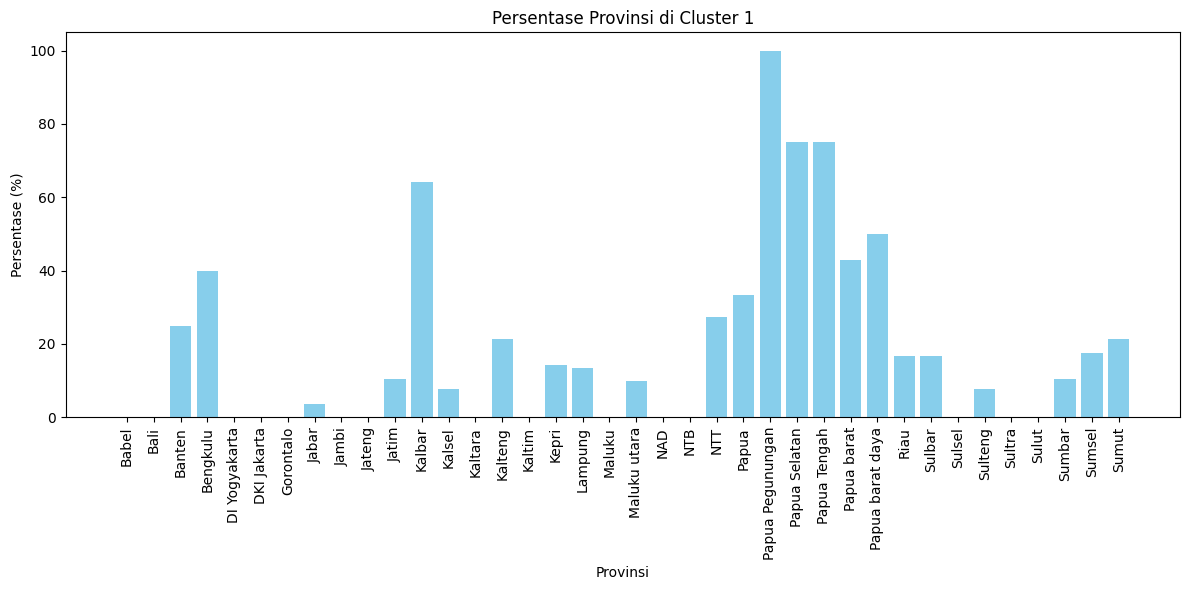

In [ ]:
# Plot for Cluster 1
plot_cluster(provinsi_cluster_percentages, 'Cluster 1')

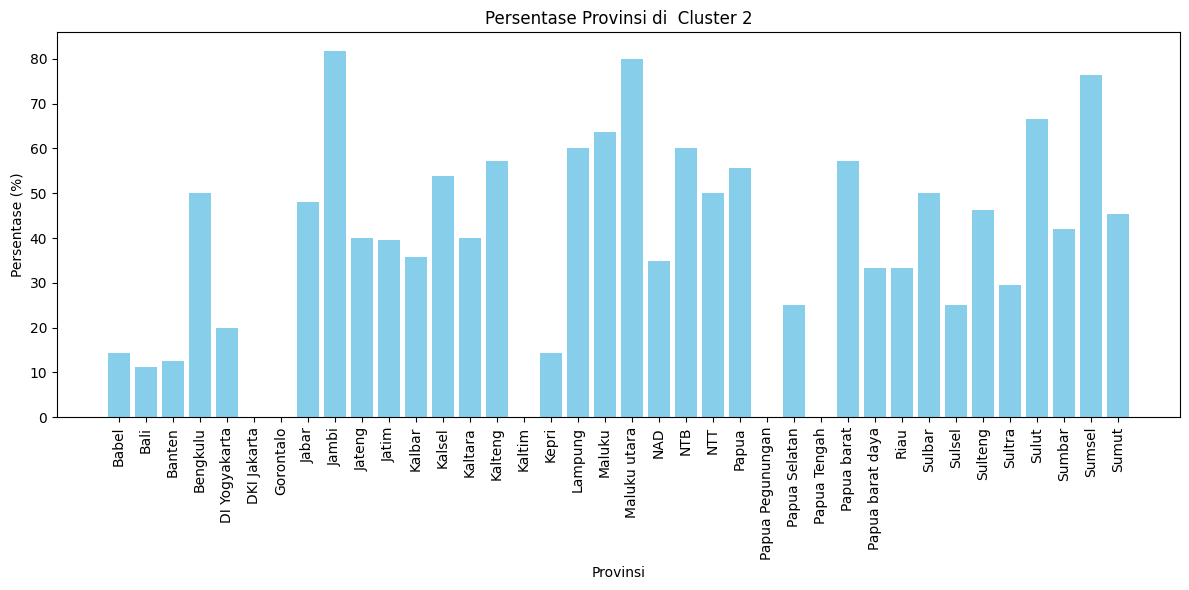

In [ ]:
# Plot for Cluster 2
plot_cluster(provinsi_cluster_percentages, ' Cluster 2')